In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("c:\Data files\micro_credit.csv")

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.shape

(209593, 37)

In [5]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

## EDA

In [7]:
# Here feature "Unnamed" is not relevant, so i am droping it
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


There are large difference in 75% and max in most of column features that means there are extreme outliers present in the dataset.

In [9]:
#df.label.value_counts()

In [10]:
#df.corr()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-null int64
medianamnt_ma_rech90    209593 non-nul

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

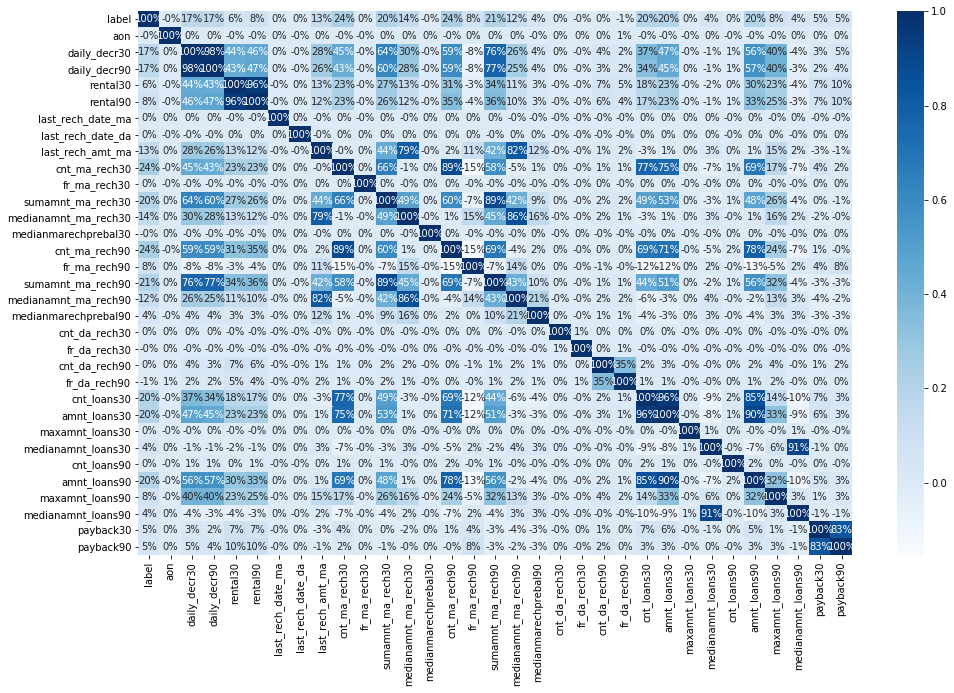

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap="Blues",annot=True,fmt='0.0%')

By observing heatmap of correlation matrix, we came to conclusion that most of the features do not have any correlation. And few of them have correlation.

In [14]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [15]:
#Separating numerical values and Categorical values
df_int=df.select_dtypes(include=[np.number])

In [16]:
df_obj=df.select_dtypes(include=[np.object])

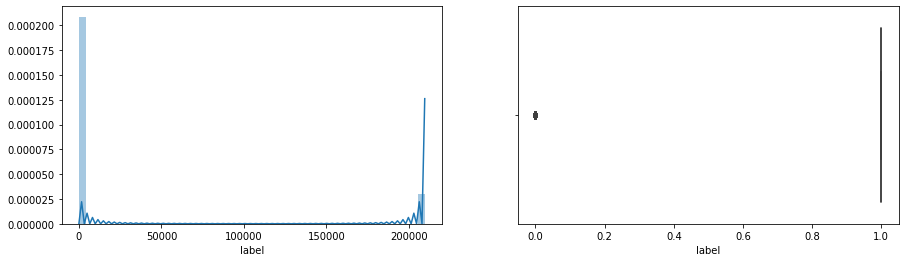

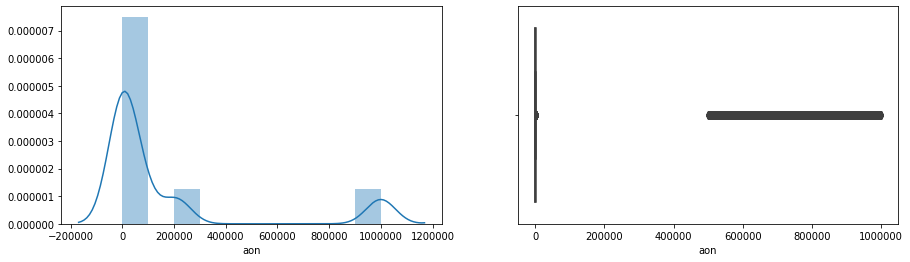

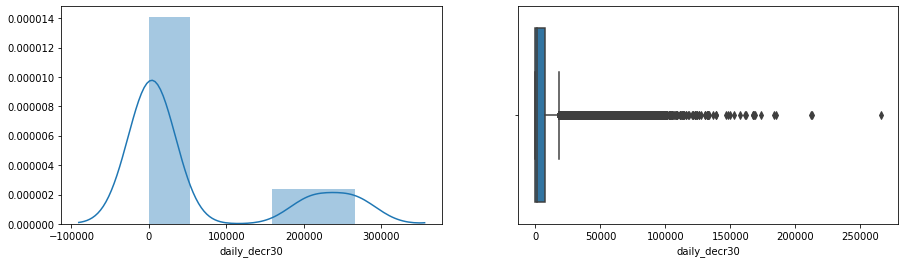

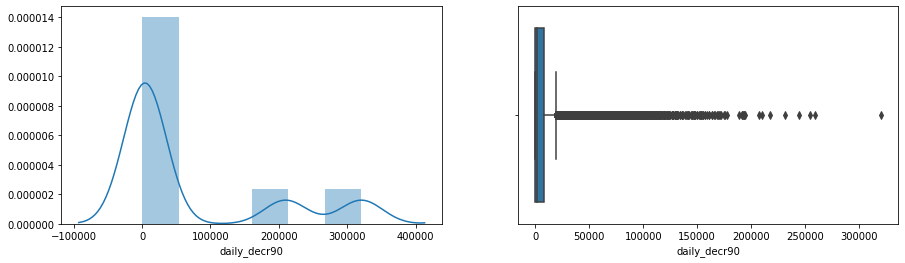

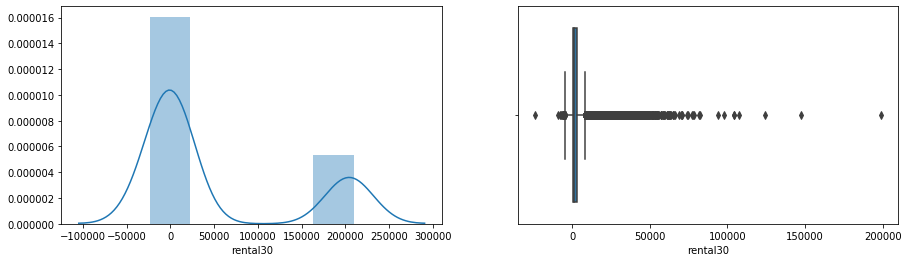

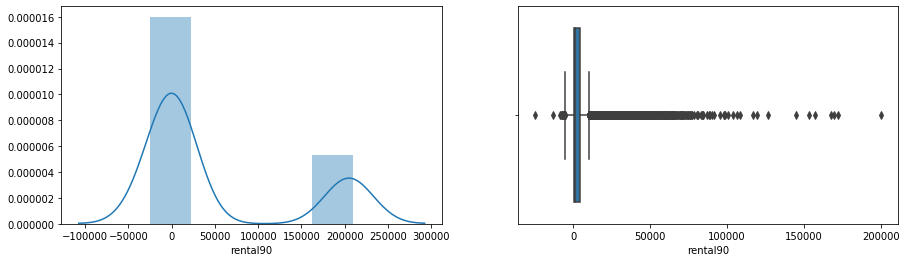

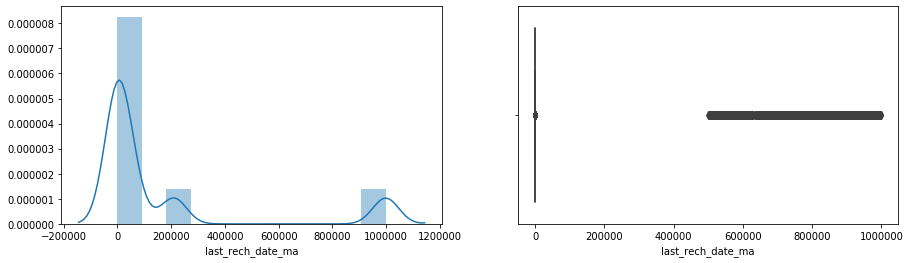

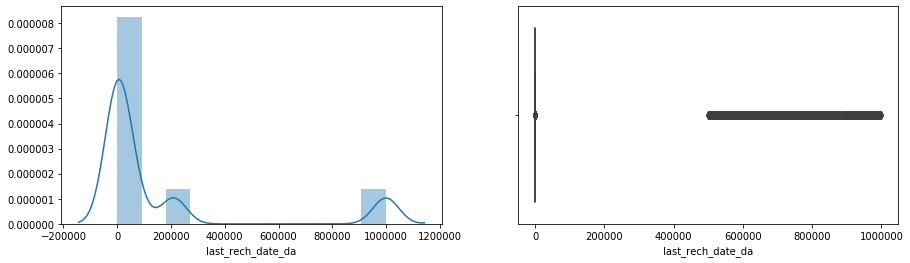

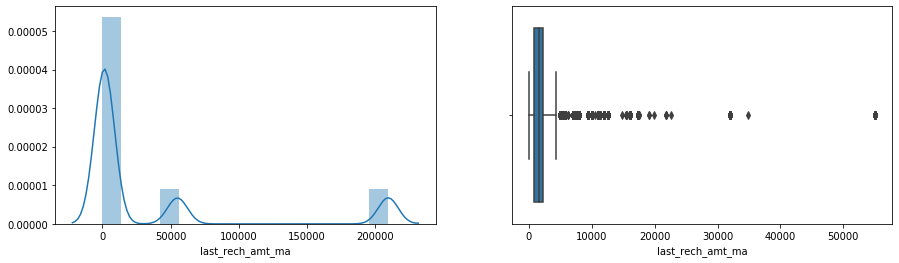

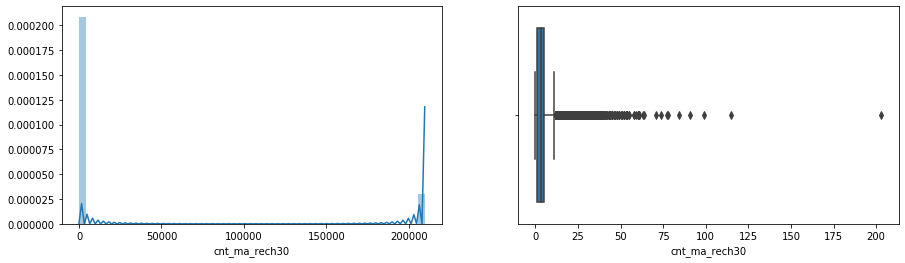

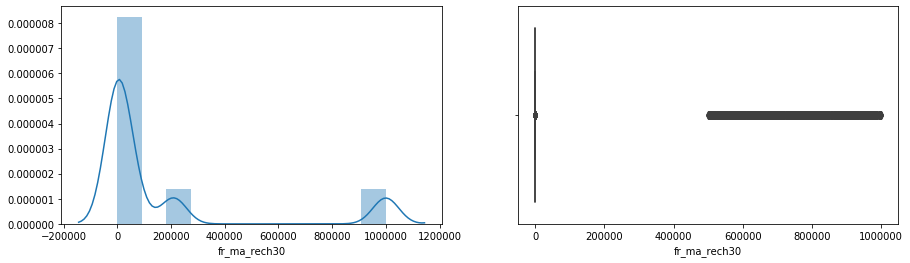

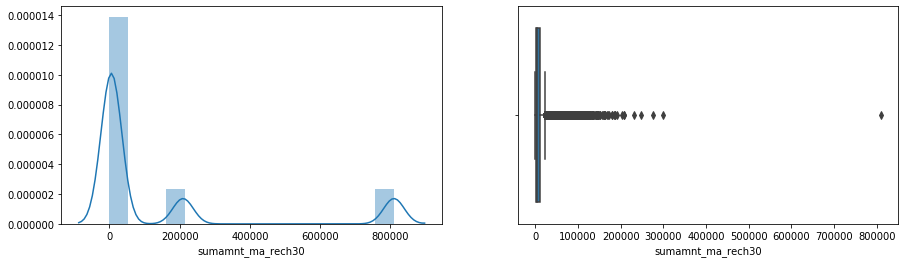

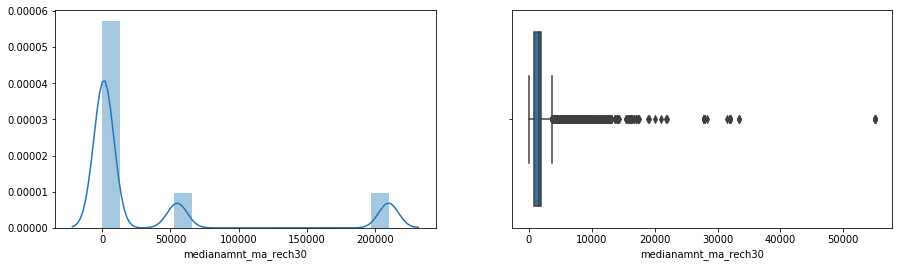

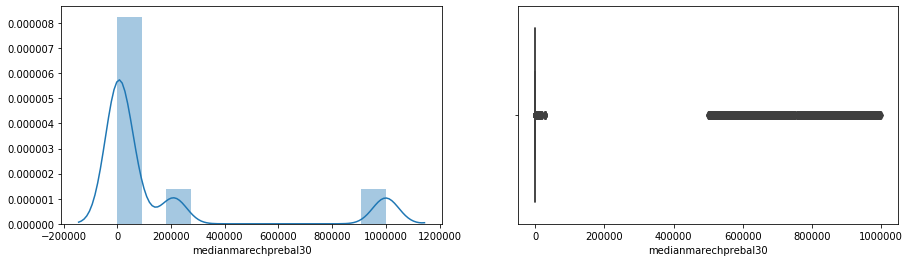

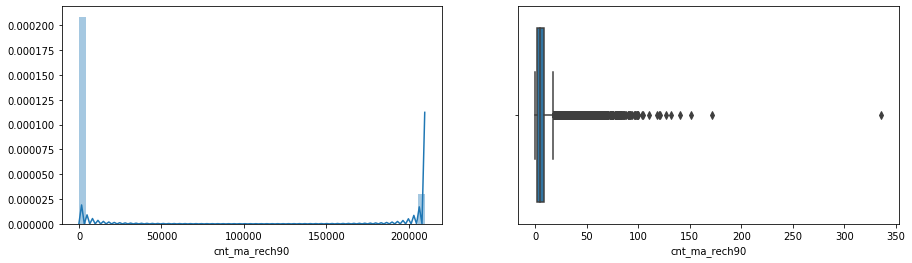

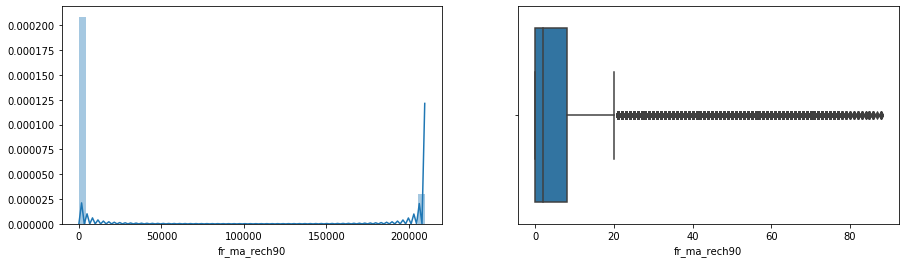

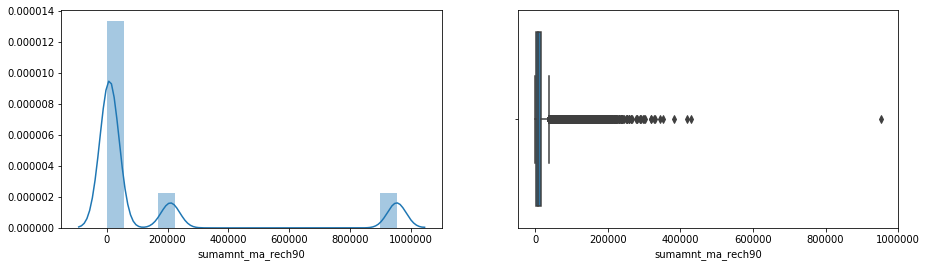

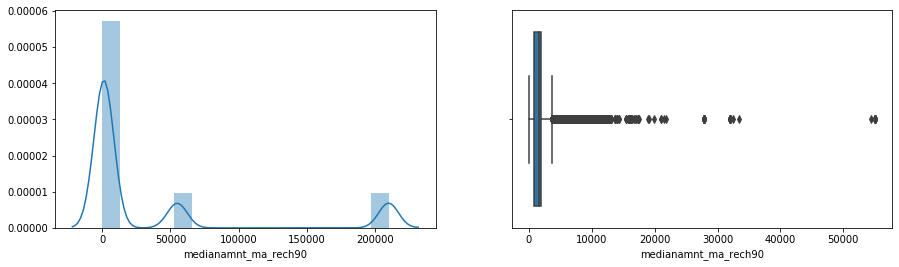

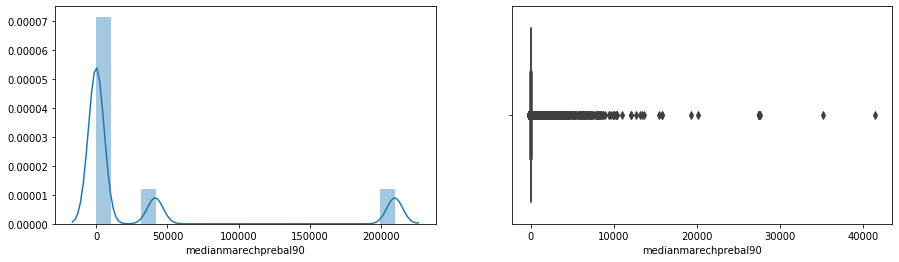

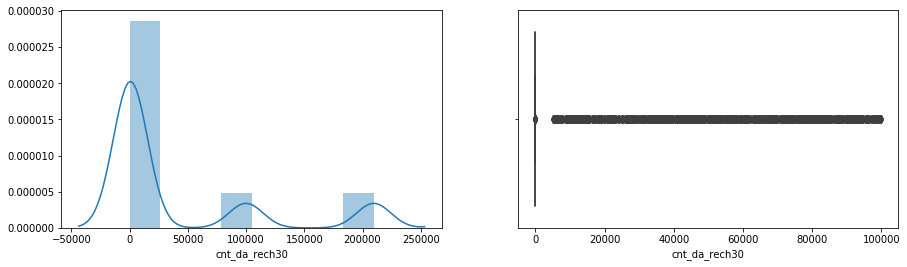

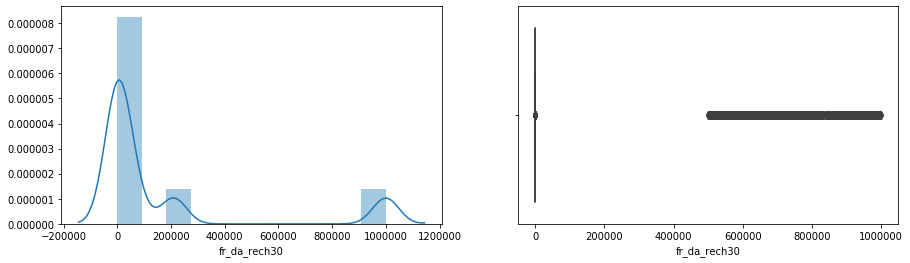

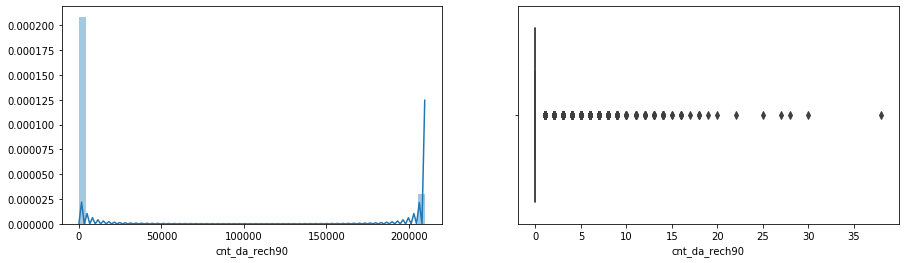

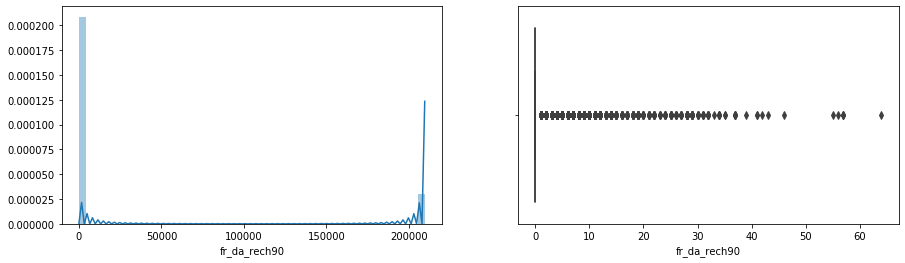

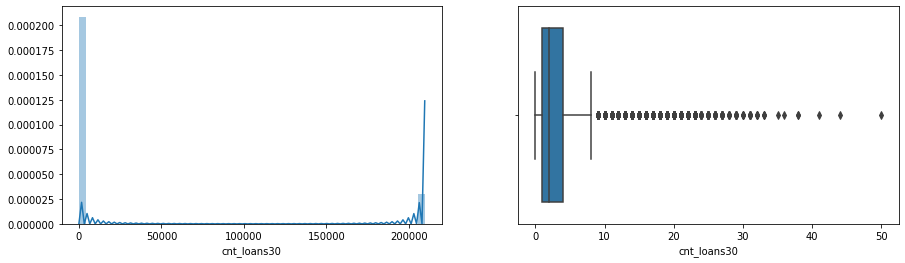

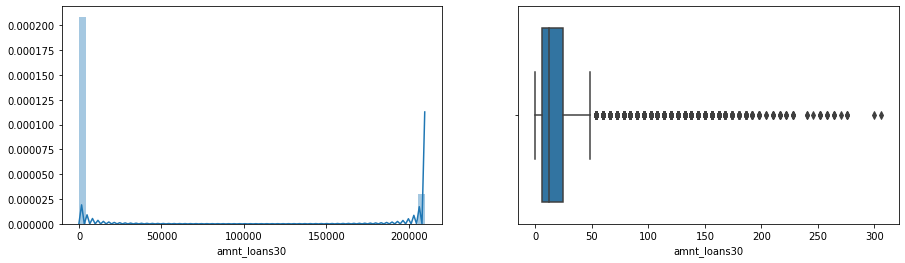

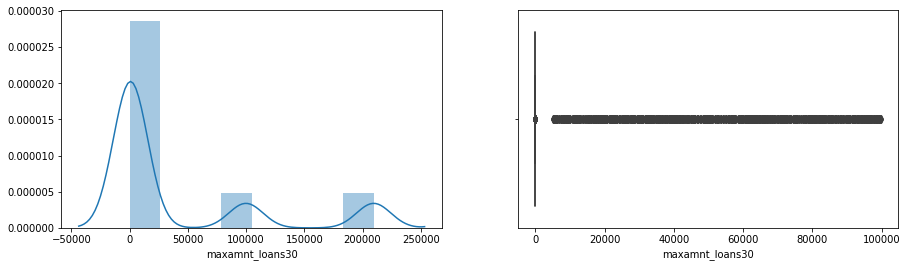

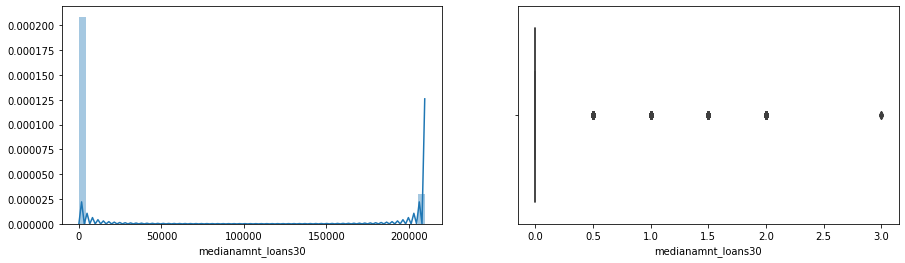

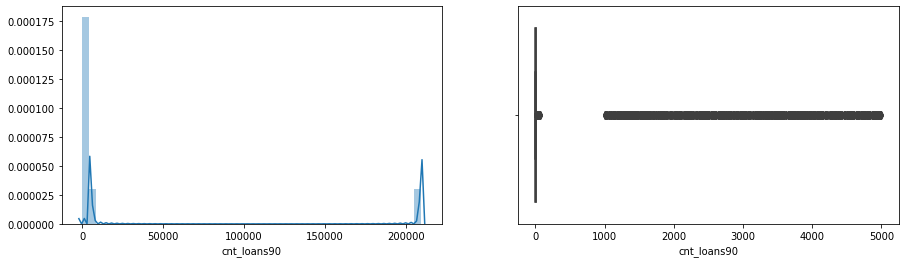

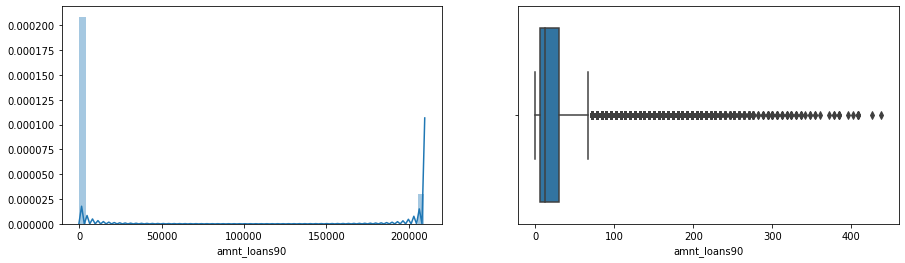

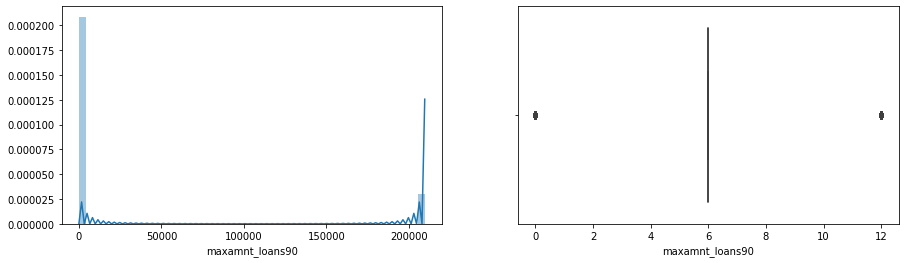

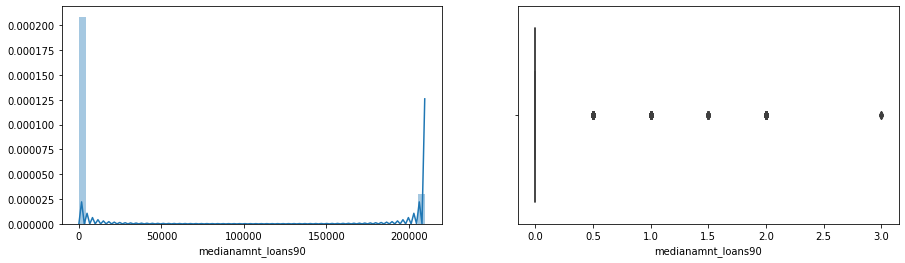

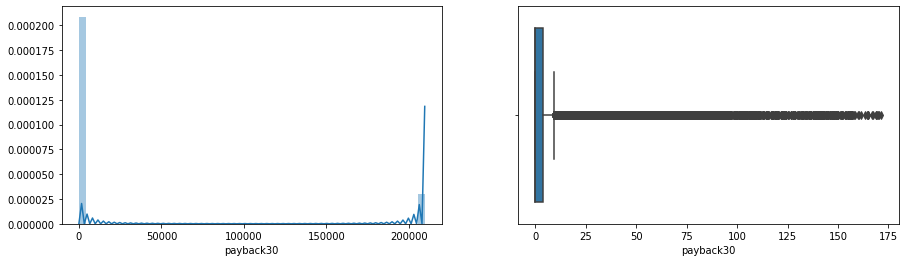

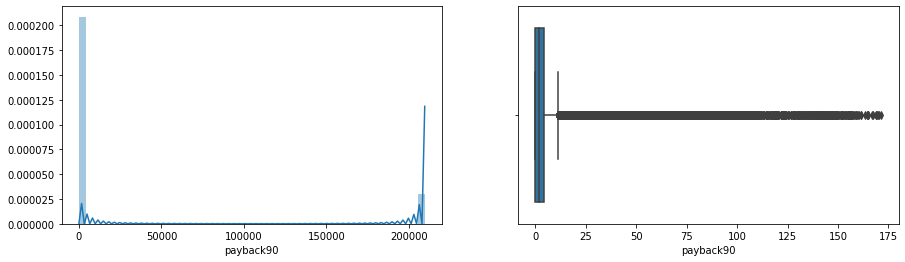

In [17]:
#univariate analysis
import warnings
warnings.filterwarnings('ignore')
for i in df_int:
    g=plt.figure(figsize=(15,4))
    g.add_subplot(1,2,1)
    sns.distplot(df[i].describe())
    g.add_subplot(1,2,2)
    sns.boxplot(df[i])

By observing distplot and box plot of data, we can see some outliers are present in the data. So we will remove outliers from the data.

In [18]:
from scipy.stats import zscore
import numpy as np

In [19]:
z=np.abs(zscore(df.select_dtypes(include=[np.number])))

In [20]:
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [21]:
threshold=3

In [22]:
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [23]:
z[21][15]

4.4703916213001245

In [ ]:
# Removing outliers
df1=df[(z<3).all(axis=1)]

In [25]:
df1.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [26]:
df.shape

(209593, 36)

In [27]:
df1.shape

(161465, 36)

Now we removed outliers.

In [28]:
# As we see in the dataset pcircle is the name of celluler network, so it is not useful
df1.drop(columns=['pcircle'],inplace=True)

In [29]:
#Here costomer id will not help us, so i will drop it.
df1.drop(columns=['msisdn'],inplace=True)

In [30]:
df1.shape

(161465, 34)

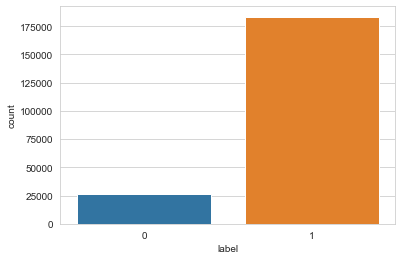

In [130]:
# Checking the average count of label
sns.set_style('whitegrid')
sns.countplot(x='label', data=df)

Above we can see that our dataset is imbalanced.87.5% of customers are non-defaulters and 12.5% are defaulters.

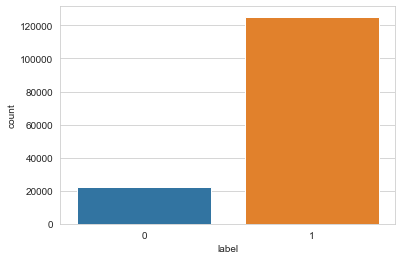

In [131]:
# After removing outliers again we check, what is the ratio of defaulters and non-defaulters users
sns.set_style('whitegrid')
sns.countplot(x='label', data=df1)

Ratio is same as before.

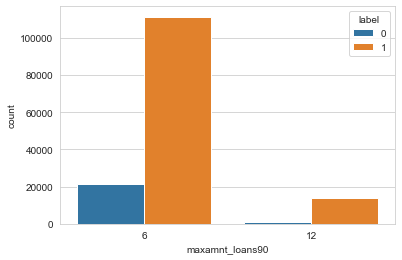

In [132]:
# Lets check the count of the maximum loan amount in 90 days taking by users along with label
sns.set_style('whitegrid')
sns.countplot(x='maxamnt_loans90',hue='label',data=df1)

Maximum users have taken 6 rupees loan and few users took 12 rupees loan, 12.5% of them are defaulters.

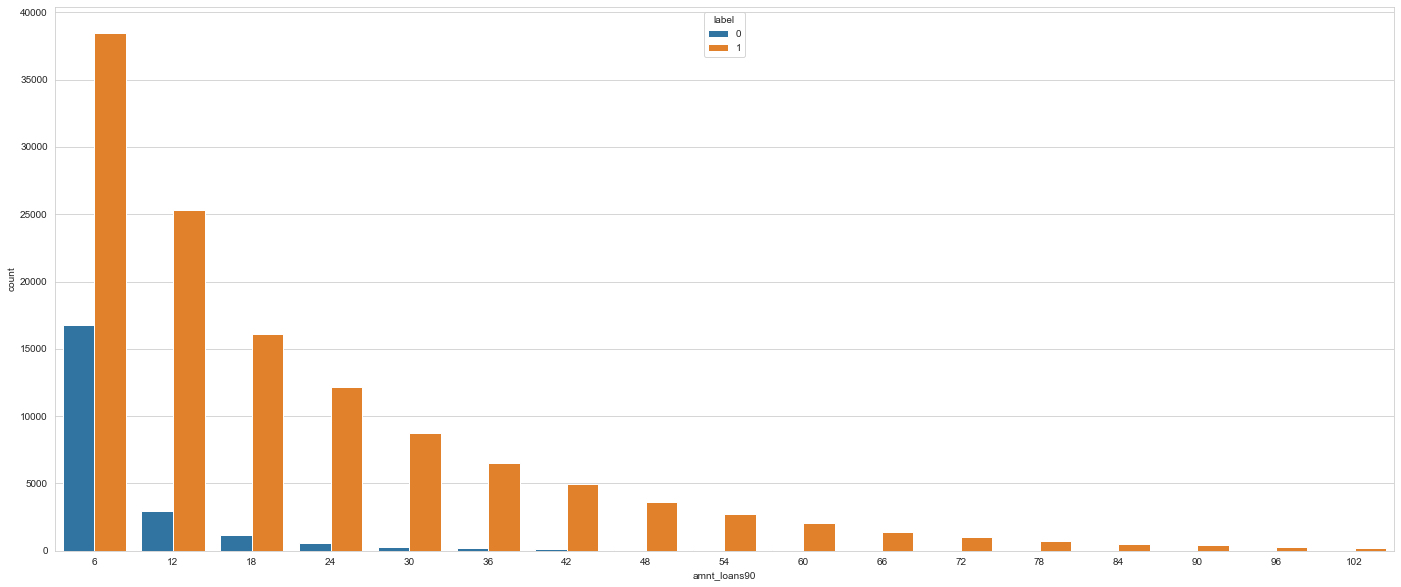

In [133]:
sns.set_style('whitegrid')
plt.figure(figsize=(24,10))
sns.countplot(x='amnt_loans90',hue='label',data=df1)

Maximum of users have taken 6 rupees of loan.

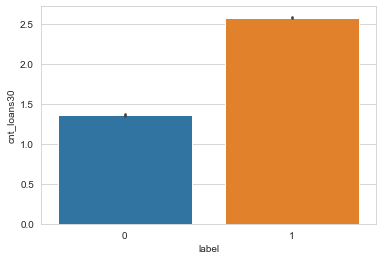

In [134]:
sns.barplot(x='label',y='cnt_loans30',data=df1)

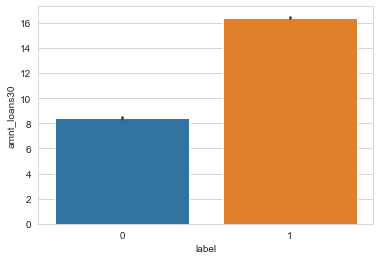

In [135]:
sns.barplot(x='label',y='amnt_loans30',data=df1)

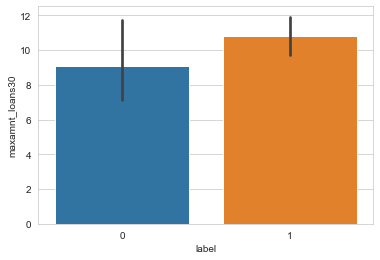

In [136]:
sns.barplot(x='label',y='maxamnt_loans30',data=df1)

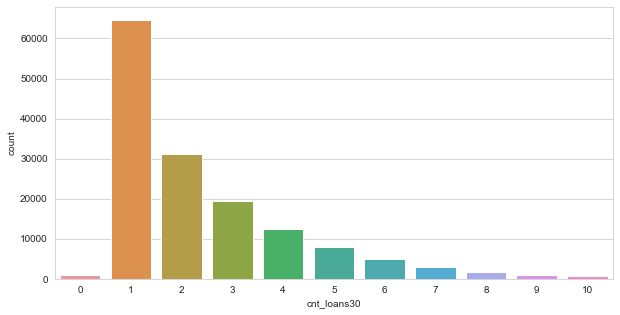

In [137]:
# Lets check the number of loans taken by user in last 30 days
plt.figure(figsize=(10,5))
sns.countplot(x='cnt_loans30',data=df1)

Maximum of users took loan only one time in last 30 days.

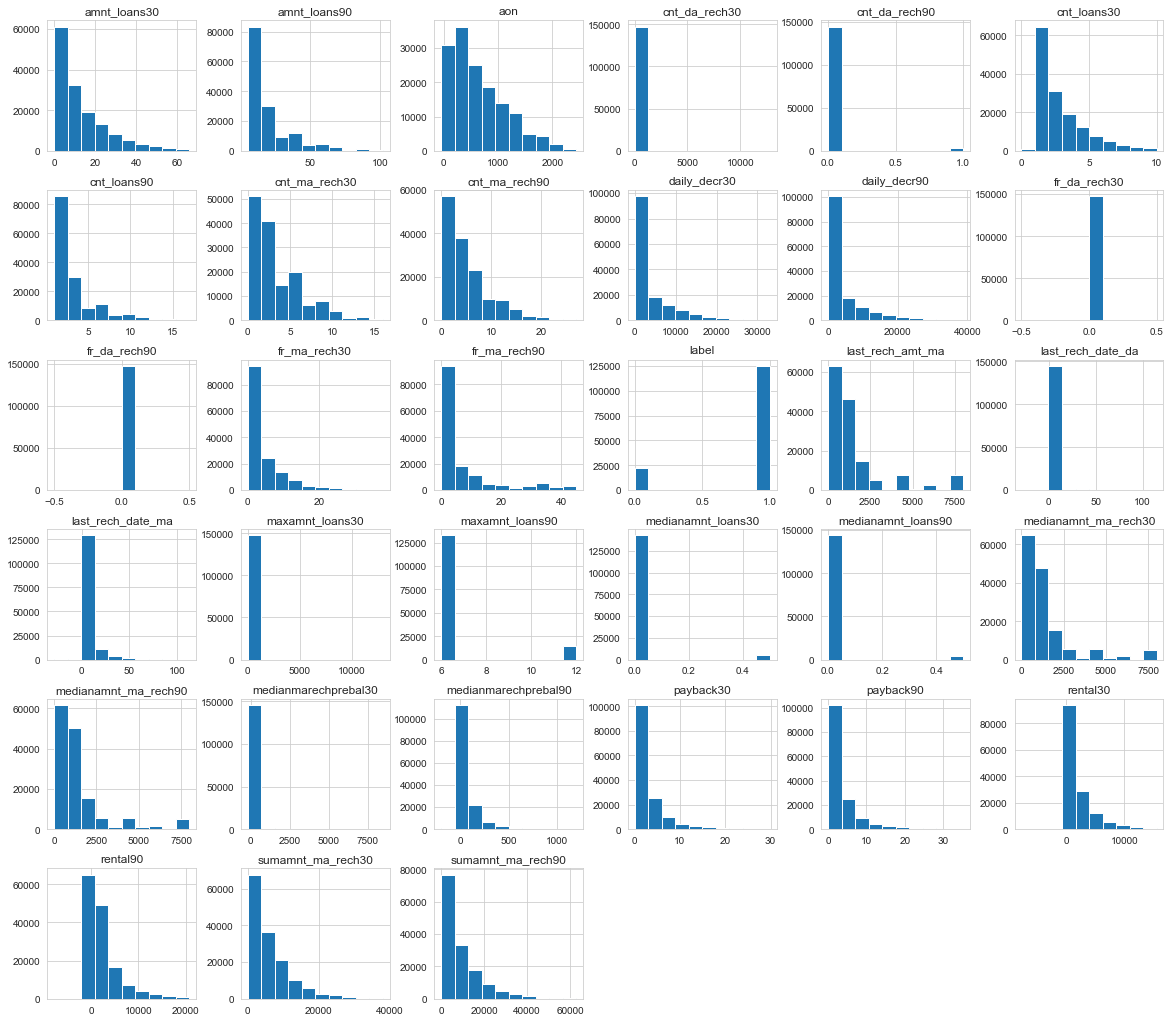

In [148]:
# Histogram of dataset
df1.hist(figsize=(20,18))
plt.show()

In [ ]:
# Checking the skewness

In [31]:
df1.skew()

label                   -2.090315
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90             1.695156
maxamnt_loans9

In [32]:
# I will drop the pdate column because it will not affect the outcome prediction
df1.drop(columns=['pdate'],inplace=True)

In [33]:
df1.head(3)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0
2,1,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0


In [34]:
df1.shape

(161465, 33)

In [35]:
# Now separating the data into input and output features
x=df1.drop(columns=["label"])
y=df1[["label"]]

In [36]:
x.shape

(161465, 32)

In [37]:
y.shape

(161465, 1)

In [38]:
# Scaling input data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [40]:
# Spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42,stratify=y)

In [41]:
print(x_train.shape,'\t\t',x_test.shape)
print(y_train.shape,'\t',y_test.shape)

(121098, 32) 		 (40367, 32)
(121098, 1) 	 (40367, 1)


In [42]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [43]:
from sklearn.metrics import classification_report,roc_curve,auc

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [45]:
LR=LogisticRegression()
GNB=GaussianNB()
KNN=KNeighborsClassifier()
RFC=RandomForestClassifier()

In [46]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('KNeighborsClassifier',KNN))
models.append(('RandomForestClassifier',RFC))

************ LogisticRegression **********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.8640225927118687


Cross_Val_Score= 0.8645279284109757


roc_auc_score= 0.5397226100078482


classification_report
               precision    recall  f1-score   support

           0       0.56      0.09      0.16      5600
           1       0.87      0.99      0.93     34767

    accuracy                           0.86     40367
   macro avg       0.72      0.54      0.54     40367
weighted avg       0.83      0.86      0.82     40367



[[  509  5091]
 [  398 34369]]





************ GaussianNB **********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score= 0.6479550127579459


Cross_Va

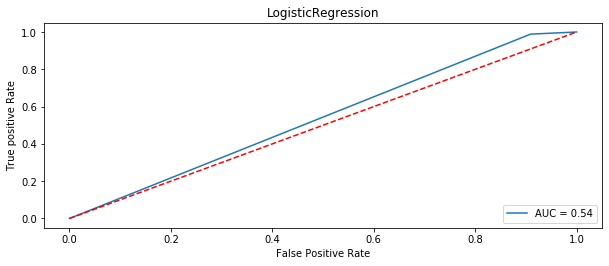

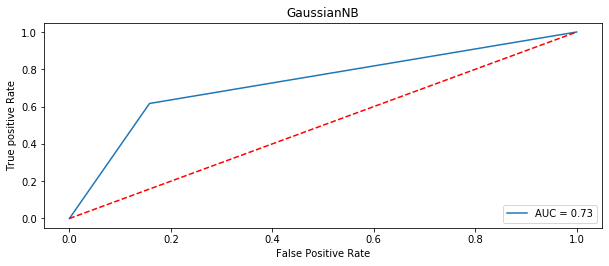

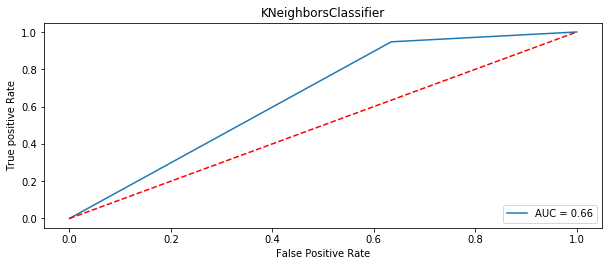

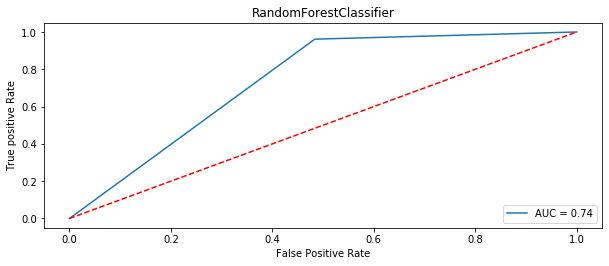

In [47]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('************',name,'**********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [48]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,86.402259,86.452793,53.972261
1,GaussianNB,64.795501,64.581180,72.940980
2,KNeighborsClassifier,86.667327,86.798380,65.646418
3,RandomForestClassifier,89.981916,90.099405,73.892576


In [49]:
#choose Random Forest classifier as our final model and random state 42

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.25)
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)

In [51]:
from sklearn.metrics import f1_score
print("f1 score is : ",f1_score(y_test,y_pred))

f1 score is :  0.9437740259374517


In [52]:
from sklearn.externals import joblib
joblib.dump(RFC,'Micro_Credit_Loan_RFC.pkl')

C:\Users\tiya\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Micro_Credit_Loan_RFC.pkl']

# Conclusion:

We applied four models- Logistic Regression, GaussianNB, KNeighbours Classifier and Random Forest Classifier. Among them RFC worked better, so we choosed it as our final model.This model giving f1 score as 94 %. 